Data Analysis and Price Prediction using Linear Regression

Introduction

The vehicle trade dataset project is a classification project which focuses on the data analysis and linear regression model in order to predict the most probable price of the vehicle.

In this project I'm trying to analyze the used car prices from the dataset available 

Import necessary libaries

In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score


Data Exploration and Preparation

In [36]:
vtd = pd.read_csv("vehicle_trade_data.csv")
vtd


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3


In [37]:
print(vtd.shape)
print(vtd.columns)

(96269, 14)
Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'make_model', 'age'],
      dtype='object')


DATA COLUMNS ANALYSIS

Public_reference: There is no actionable information for this variable

reg_code: There is no actionable information for this variable

Mileage: The number of miles travelled or covered throughout the lifespan of the vehicle. This has 96247 non null entries in total with 22 entries missing from the grand total of the entire dataset. It has the following statistics:

Mean = 42964.06
Max Mileage = 999999
S-Deviation = 34051.70
Mileage has outliers which would have to be handled.

Year Of Reg.: This has 96269 non null entries, which means there're no missing values and carries stats as follows:

Mean Year = 2015
Max Year = 2020
S-Deviation = 3.7

Age: This has a total of 96269 non null entries, meaning no missing values and carries metrics as follows:

Average Age = 6.9
Max Age = 60.0
S-Deviation = 3.7

Price:This has a total of 96269 non null entries, meaning no missing values and carries metrics as follows:

mean = 12266
Max price = 158500
S-Deviation = 7414.8

Standard_colour: The body colour of the vehicle, which consist of 5-total - 
    Grey
    Blue
    Black 
    Sliver
    White
Most Occurent = Black with 26479 entries     

Standard_make: The name of the vehicle manufacturer (11 total)
'MINI', 'Volkswagen', 'Mercedes-Benz', 'Vauxhall', 'Nissan',
       'Toyota', 'Audi', 'Renault', 'BMW', 'Fiat', 'Kia']
 Most Occurent = BMW with 16585 entries

Standard_model: The specific type of vehicle made by a manufacturer. (19 total)
'Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke'
Most Occurent = Golf with 8975 entries
       
Body_type: The shape of the vehicle (5 total)
'Hatchback', 'Estate', 'Saloon', 'SUV', 'Coupe'
Most Occurent = Hatchback with 59227 entries

Fuel_type: This describes the type of fuel the vehicle uses(2 total)
'Petrol', 'Diesel'
Most Occurent = Petrol with 54805 entries

Make_ model: A combination of the name and model columns
Most Occurent: Volkswagen - Golf with 8975 entries

Vehicle_conditions: This is the state of the vehicle which shows if the vehicle was previously owned or not. All vehicles in this dataset are USED

In [38]:
vtd.describe(include=['O'])

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,make_model
count,96257,96269,96269,96269,96269,96269,96269,96269
unique,58,5,11,19,1,5,2,19
top,17,Black,BMW,Golf,USED,Hatchback,Petrol,Volkswagen - Golf
freq,10218,26479,16585,8975,96269,59227,54805,8975


In [39]:
vtd.standard_colour.unique()

array(['Grey', 'Blue', 'Black', 'Silver', 'White'], dtype=object)

In [40]:
 vtd.standard_make.unique()

array(['MINI', 'Volkswagen', 'Mercedes-Benz', 'Vauxhall', 'Nissan',
       'Toyota', 'Audi', 'Renault', 'BMW', 'Fiat', 'Kia'], dtype=object)

In [41]:
vtd.standard_model.unique()

array(['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke'],
      dtype=object)

In [42]:
vtd.body_type.unique()

array(['Hatchback', 'Estate', 'Saloon', 'SUV', 'Coupe'], dtype=object)

In [43]:
vtd.fuel_type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [44]:
vtd.make_model.unique()

array(['MINI - Hatch', 'Volkswagen - Golf', 'Mercedes-Benz - C Class',
       'Vauxhall - Corsa', 'Nissan - Qashqai', 'Toyota - Yaris',
       'Volkswagen - Polo', 'Vauxhall - Astra', 'Audi - A1',
       'Mercedes-Benz - E Class', 'Renault - Clio',
       'Mercedes-Benz - A Class', 'BMW - 5 Series', 'BMW - 1 Series',
       'Fiat - 500', 'Audi - A3', 'Kia - Sportage', 'BMW - 3 Series',
       'Nissan - Juke'], dtype=object)

In [45]:
vtd.vehicle_condition.unique

<bound method Series.unique of 0        USED
1        USED
2        USED
3        USED
4        USED
         ... 
96264    USED
96265    USED
96266    USED
96267    USED
96268    USED
Name: vehicle_condition, Length: 96269, dtype: object>

In [46]:
vtd.describe()

,public_reference,mileage,year_of_registration,price,age
count,9.626900e+04,96247.000000,96269.000000,96269.000000,96269.000000
mean,2.020082e+14,42964.067150,2015.096075,12266.081615,6.903925
std,1.194558e+10,34051.708175,3.766205,7414.823331,3.766205
min,2.014120e+14,0.000000,1962.000000,200.000000,2.000000
25%,2.020091e+14,17000.000000,2013.000000,6999.000000,4.000000
50%,2.020100e+14,34352.000000,2016.000000,11030.000000,6.000000
75%,2.020102e+14,62000.000000,2018.000000,15999.000000,9.000000
max,2.020110e+14,999999.000000,2020.000000,158500.000000,60.000000


In [47]:
vtd.standard_colour.value_counts()

Black     26479
White     21326
Grey      16986
Silver    15767
Blue      15711
Name: standard_colour, dtype: int64

In [48]:
vtd.standard_make.value_counts()

BMW              16585
Mercedes-Benz    16174
Volkswagen       14753
Vauxhall         13529
Nissan            9953
Audi              8917
MINI              5363
Kia               3519
Renault           2763
Fiat              2754
Toyota            1959
Name: standard_make, dtype: int64

In [49]:
vtd.standard_model.value_counts()

Golf        8975
Corsa       7876
C Class     6818
3 Series    6727
1 Series    6449
Qashqai     5994
Polo        5778
Astra       5653
Hatch       5363
A Class     5361
A3          5246
E Class     3995
Juke        3959
A1          3671
Sportage    3519
5 Series    3409
Clio        2763
500         2754
Yaris       1959
Name: standard_model, dtype: int64

In [50]:
vtd.body_type.value_counts()

Hatchback    59227
Saloon       14235
SUV          13202
Estate        6095
Coupe         3510
Name: body_type, dtype: int64

In [51]:
vtd.fuel_type.value_counts()

Petrol    54805
Diesel    41464
Name: fuel_type, dtype: int64

In [52]:
vtd.make_model.value_counts()

Volkswagen - Golf          8975
Vauxhall - Corsa           7876
Mercedes-Benz - C Class    6818
BMW - 3 Series             6727
BMW - 1 Series             6449
Nissan - Qashqai           5994
Volkswagen - Polo          5778
Vauxhall - Astra           5653
MINI - Hatch               5363
Mercedes-Benz - A Class    5361
Audi - A3                  5246
Mercedes-Benz - E Class    3995
Nissan - Juke              3959
Audi - A1                  3671
Kia - Sportage             3519
BMW - 5 Series             3409
Renault - Clio             2763
Fiat - 500                 2754
Toyota - Yaris             1959
Name: make_model, dtype: int64

In [53]:
vtd.vehicle_condition.value_counts()

USED    96269
Name: vehicle_condition, dtype: int64

In [54]:
print(vtd.info())
vtd.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96269 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96257 non-null  object 
 3   standard_colour        96269 non-null  object 
 4   standard_make          96269 non-null  object 
 5   standard_model         96269 non-null  object 
 6   vehicle_condition      96269 non-null  object 
 7   year_of_registration   96269 non-null  float64
 8   price                  96269 non-null  int64  
 9   body_type              96269 non-null  object 
 10  crossover_car_and_van  96269 non-null  bool   
 11  fuel_type              96269 non-null  object 
 12  make_model             96269 non-null  object 
 13  age                    96269 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
34902,202010215257049,108720.0,16,Blue,BMW,3 Series,USED,2016.0,10395,Saloon,False,Petrol,BMW - 3 Series,6
81972,202008062156208,6660.0,69,White,BMW,5 Series,USED,2019.0,29950,Saloon,False,Petrol,BMW - 5 Series,3
56507,201908090961363,27249.0,68,Grey,Volkswagen,Golf,USED,2018.0,14149,Hatchback,False,Diesel,Volkswagen - Golf,4


REMOVING MISSING VALUES

As seen from below, some columns have missing values. display_missing function shows the count of missing values in every column in both training and test set.

Training set have missing values in reg_code and mileage columns

In [55]:
vtd.isnull().sum()

public_reference          0
mileage                  22
reg_code                 12
standard_colour           0
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration      0
price                     0
body_type                 0
crossover_car_and_van     0
fuel_type                 0
make_model                0
age                       0
dtype: int64

In [56]:
mileage = vtd[~vtd.mileage.isnull()]

In [57]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96247 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96235 non-null  object 
 3   standard_colour        96247 non-null  object 
 4   standard_make          96247 non-null  object 
 5   standard_model         96247 non-null  object 
 6   vehicle_condition      96247 non-null  object 
 7   year_of_registration   96247 non-null  float64
 8   price                  96247 non-null  int64  
 9   body_type              96247 non-null  object 
 10  crossover_car_and_van  96247 non-null  bool   
 11  fuel_type              96247 non-null  object 
 12  make_model             96247 non-null  object 
 13  age                    96247 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

In [58]:
new_vtd = mileage.drop(["reg_code", "public_reference"], axis = 1)

In [59]:
new_vtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mileage                96247 non-null  float64
 1   standard_colour        96247 non-null  object 
 2   standard_make          96247 non-null  object 
 3   standard_model         96247 non-null  object 
 4   vehicle_condition      96247 non-null  object 
 5   year_of_registration   96247 non-null  float64
 6   price                  96247 non-null  int64  
 7   body_type              96247 non-null  object 
 8   crossover_car_and_van  96247 non-null  bool   
 9   fuel_type              96247 non-null  object 
 10  make_model             96247 non-null  object 
 11  age                    96247 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 8.9+ MB


C:\Users\HP\AppData\Local\Temp\ipykernel_4240\3767955710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column]/1000


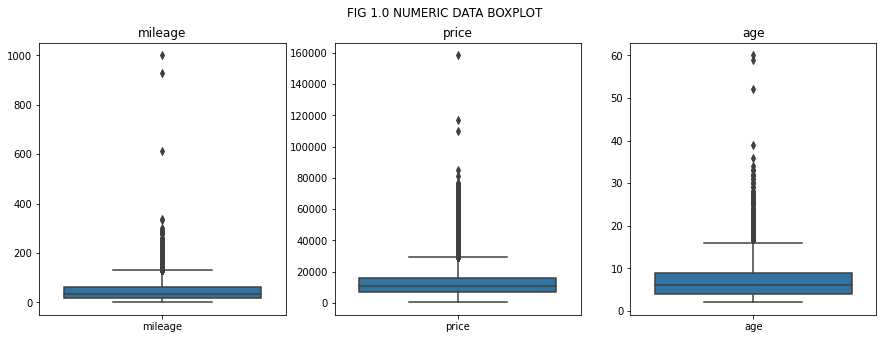

In [60]:
numeric_cols = ['mileage', 'price', 'age']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for index, column in enumerate(numeric_cols):
  
  numeric_df = vtd[[column]]
  if column == "mileage":
    numeric_df[column] = numeric_df[column]/1000
  sns.boxplot(ax=axes[index], data=numeric_df)
  axes[index].set_title(column)
  fig.suptitle("FIG 1.0 NUMERIC DATA BOXPLOT")

REMOVING OUTLIERS

As seen from above plot (FIG 1.0), all the numeric columns possess outliers which need to be handled.

We use the Inter-quartile range method to determine and cutoff outliers and hence reduce the presence of noise.

In [61]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

In [62]:
outlier_free_mileage = removeOutliers(new_vtd, "mileage")
outlier_free_age = removeOutliers(outlier_free_mileage, "age")
outlier_free_price = removeOutliers(outlier_free_mileage, "price")
outlier_free_data = outlier_free_age

IQR value for column mileage is: 45000.0
IQR value for column age is: 5.0
IQR value for column price is: 8665.0


In [63]:
outlier_free_data.shape

(92579, 12)

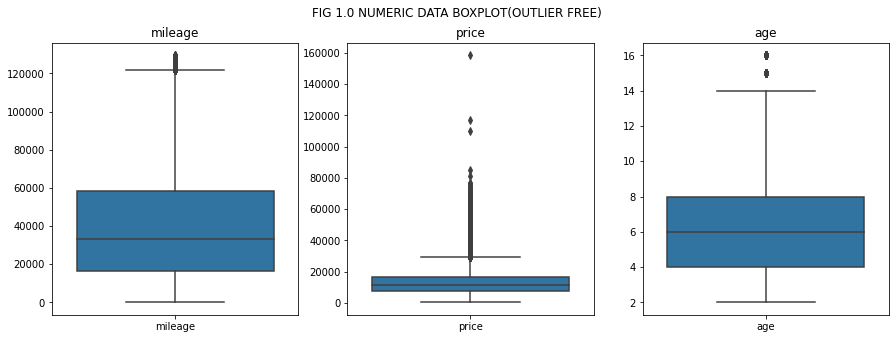

In [64]:
numeric_cols = ['mileage', 'price', 'age']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for index, column in enumerate(numeric_cols):
  
  numeric_df = outlier_free_data[[column]]
  sns.boxplot(ax=axes[index], data=numeric_df)
  axes[index].set_title(column)
  fig.suptitle("FIG 1.0 NUMERIC DATA BOXPLOT(OUTLIER FREE)")

LINEAR REGRESSION MODEL

In [65]:
# from sklearn.preprocessing import LabelEncoder

# df = LabelEncoder()
# vtd['standard_colour'] = df.fit_transform(vtd['standard_colour'])
# vtd['standard_make'] = df.fit_transform(vtd['standard_make'])
# vtd['standard_model'] = df.fit_transform(vtd['standard_model'])
# vtd['body_type'] = df.fit_transform(vtd['body_type'])
# vtd['fuel_type'] = df.fit_transform(vtd['fuel_type'])
# vtd['make_model'] = df.fit_transform(vtd['make_model'])

In [66]:
y = vtd['price']
X = vtd.drop(['price'], axis=1)
X

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,SUV,False,Diesel,Nissan - Qashqai,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,Saloon,False,Diesel,Mercedes-Benz - C Class,5
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,Saloon,False,Petrol,BMW - 3 Series,15
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,Hatchback,False,Petrol,Vauxhall - Corsa,7
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,SUV,False,Petrol,Nissan - Juke,3


In [67]:
numerical_columns = ['mileage','age']

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(X)
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])

In [69]:
data_scaled.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,0.031534,17,Grey,MINI,Hatch,USED,2017.0,Hatchback,False,Petrol,MINI - Hatch,0.051724
1,202010155026725,0.052023,66,Blue,Volkswagen,Golf,USED,2016.0,Estate,False,Diesel,Volkswagen - Golf,0.068966
2,202008142485309,0.029500,12,Grey,Mercedes-Benz,C Class,USED,2012.0,Saloon,False,Petrol,Mercedes-Benz - C Class,0.137931
3,202009183894045,0.035300,18,Grey,Vauxhall,Corsa,USED,2018.0,Hatchback,False,Petrol,Vauxhall - Corsa,0.034483
4,202010014441671,0.047299,65,Black,Nissan,Qashqai,USED,2016.0,SUV,False,Diesel,Nissan - Qashqai,0.068966


In [72]:
data_preprocessed = pd.get_dummies(data_scaled)
data_preprocessed.shape

(96269, 125)

In [73]:
data_preprocessed.head(50)

,public_reference,mileage,year_of_registration,crossover_car_and_van,age,reg_code_02,reg_code_03,reg_code_04,reg_code_05,reg_code_06,...,make_model_Mercedes-Benz - C Class,make_model_Mercedes-Benz - E Class,make_model_Nissan - Juke,make_model_Nissan - Qashqai,make_model_Renault - Clio,make_model_Toyota - Yaris,make_model_Vauxhall - Astra,make_model_Vauxhall - Corsa,make_model_Volkswagen - Golf,make_model_Volkswagen - Polo
0,202010014440649,0.031534,2017.0,False,0.051724,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,202010155026725,0.052023,2016.0,False,0.068966,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,202008142485309,0.029500,2012.0,False,0.137931,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,202009183894045,0.035300,2018.0,False,0.034483,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,202010014441671,0.047299,2016.0,False,0.068966,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,202010235355785,0.007990,2019.0,False,0.017241,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,202010155027121,0.017020,2017.0,False,0.051724,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,202002137274498,0.035000,2014.0,False,0.103448,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,202006150161276,0.061760,2009.0,False,0.189655,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,202006260546963,0.064785,2011.0,False,0.155172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
from sklearn.linear_model import LinearRegression


model  = LinearRegression() 
model2 = model.fit(X_train, y_train) 

ValueError: could not convert string to float: 'Y'

In [47]:
y_pred_test = model.predict(X_test) 
y_pred_train = model.predict(X_train)

ValueError: could not convert string to float: 'Y'

In [ ]:
# np.abs(r2_score(y_train,y_pred_train))

<!-- print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred)) -->

In [ ]:
# plt.scatter(y_test, predictions)
# plt.xlabel('y_test')
# plt.ylabel('Predictions')

In [ ]:
# score

In [ ]:
# fit_intercept=True